In [1]:
import adcc
from pyscf import gto, scf

In [2]:
# Run SCF in pyscf
mol = gto.M(
    atom='O 0 0 0;'
         'H 0 0 1.795239827225189;'
         'H 1.693194615993441 0 -0.599043184453037',
    basis='cc-pvtz',
    unit="Bohr"
)
scfres = scf.RHF(mol)
scfres.conv_tol = 1e-12
scfres.conv_tol_grad = 1e-9
scfres.kernel()
refstate = adcc.ReferenceState(scfres)

converged SCF energy = -76.0571904154805


In [3]:
# Run ADC (2 and 2x for comparison)
state_2 = adcc.adc2(refstate, n_singlets=7)
print()
state_2x = adcc.adc2x(state_2.ground_state, n_singlets=7, guesses=state_2.excitation_vectors)
print()
state_3 = adcc.adc3(state_2x.ground_state, n_singlets=7, guesses=state_2x.excitation_vectors)

Starting adc2  singlet Jacobi-Davidson ...
Niter n_ss  max_residual  time  Ritz values
  1    14       0.39135   1.5s  [0.42513831 0.50590019 0.5059818  0.58483322 0.65566604 0.74712915
 0.76426908]
  2    28      0.013426   1.4s  [0.29512418 0.36981007 0.37674447 0.4528981  0.54751869 0.63327043
 0.63888939]
  3    42    0.00037195   1.6s  [0.2944929  0.36753152 0.37534001 0.45005037 0.54562195 0.63209821
 0.63769807]
  4    56    3.4634e-05   1.8s  [0.29448216 0.36746578 0.37521223 0.44984749 0.54547344 0.63193585
 0.6375989 ]
  5    70    9.4546e-07   2.1s  [0.29448182 0.36746378 0.3752094  0.44983771 0.54546393 0.63193085
 0.63759499]
=== Converged ===
    Number of matrix applies:    140
    Total solver time:             8s 428ms

Starting adc2x  singlet Jacobi-Davidson ...
Niter n_ss  max_residual  time  Ritz values
  1     7      0.014401   4.4s  [0.28228808 0.35677177 0.36353882 0.43995009 0.53537904 0.61680728
 0.62868375]
  2    14     0.0040087   4.5s  [0.27868225 0.3533497

In [4]:
# Show results
print(state_2.describe())
print(state_2x.describe())
print(state_3.describe())

+--------------------------------------------------------------+
| adc2                                    singlet ,  converged |
+--------------------------------------------------------------+
|  #        excitation energy     osc str    |v1|^2    |v2|^2  |
|          (au)           (eV)                                 |
|  0     0.2944818      8.013258   0.0385    0.9438   0.05623  |
|  1     0.3674638      9.999199   0.0000    0.9449   0.05514  |
|  2     0.3752094      10.20997   0.0992    0.9429   0.05707  |
|  3     0.4498377      12.24071   0.0524    0.9447   0.05534  |
|  4     0.5454639      14.84283   0.2498    0.9563   0.04366  |
|  5     0.6319309      17.19571   0.0000    0.9476   0.05241  |
|  6      0.637595      17.34984   0.0704    0.9524   0.04765  |
+--------------------------------------------------------------+

+--------------------------------------------------------------+
| adc2x                                   singlet ,  converged |
+-----------------------

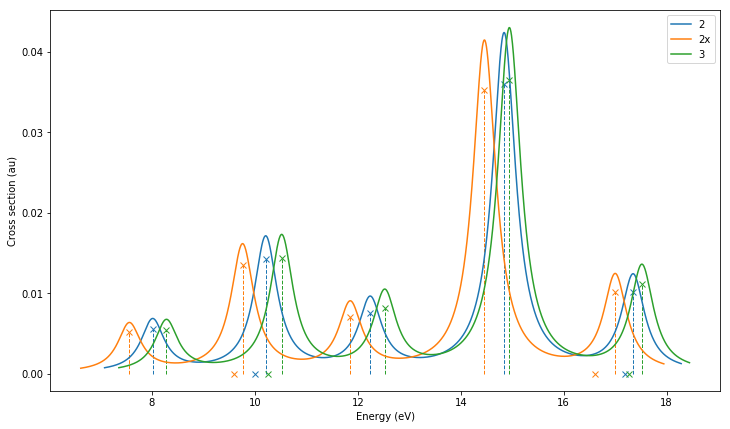

In [5]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 7))
state_2.plot_spectrum(label="2")
state_2x.plot_spectrum(label="2x")
state_3.plot_spectrum(label="3")
plt.legend()